# Indiana Flood Risk
## Deep Neural Networks for Supervised Learning - Regression

In [2]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns  #Seaborn is another powerful visulization library for Python
from sklearn.linear_model import Ridge
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import shap

In [4]:
path = "C:\\Users\\jmatney\Documents\GitHub\IndianaRisk\data\model"
df = pd.read_excel(os.path.join(path, "IN_Risk_Model.xlsx"))

In [5]:
df

,subwatershed,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,...,population_density.y,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
0,51202080201,0.299470,1.010000e+02,11.031308,0.307262,0.412036,9.386736,3.610590e-03,0.050787,0.697929,...,193.107921,58111.000000,1673,41.366667,884.262553,503.506692,0.146502,6789.381348,3212.713978,1180.826665
1,51201110302,0.485784,5.000000e+01,4.080327,0.718304,0.283812,1.484138,4.839883e-03,0.014050,4.034926,...,104.643085,56771.333333,-431,41.466667,1261.467019,535.669076,1.180721,6862.660156,25613.870480,2713.363580
2,51201060507,0.322675,2.600000e+01,2.030253,0.815297,0.647139,1.778003,2.980456e-03,0.017181,2.977041,...,321.678527,48506.750000,-243,41.675000,584.613292,297.702490,1.084871,6175.916504,27111.136390,28374.903350
3,71200010303,0.326203,3.710738e-09,2.053226,0.000588,0.308209,1.027938,4.436303e-13,0.009651,4.357636,...,366.175097,61766.200000,38,42.000000,1087.881755,964.682414,4.389772,5982.229004,33976.722030,43.018237
4,50800030717,0.379072,7.600000e+01,10.546125,0.172761,0.501159,3.978998,4.231477e-03,0.068939,18.411886,...,256.032460,55698.400000,-833,40.660000,555.426454,409.885301,1.661841,5676.336426,63568.611420,9695.319736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,71200010502,0.240000,3.710000e+01,3.470000,0.440000,0.250000,3.500000,0.000000e+00,0.010000,3.830000,...,359.640000,51922.500000,-261,42.930000,912.910000,796.990000,0.150000,6789.380000,37197.085120,8582.128831
759,71200010602,0.390000,1.949000e+01,1.160000,0.790000,0.490000,2.020000,0.000000e+00,0.010000,0.000000,...,173.150000,53627.670000,-684,41.600000,865.100000,516.570000,1.390000,6639.860000,17181.581280,23632.585480
760,71200010703,0.380000,1.949000e+01,1.160000,0.580000,0.820000,1.930000,0.000000e+00,0.020000,34.480000,...,95.140000,52547.500000,57,38.500000,450.170000,253.230000,1.390000,6639.860000,27942.486560,2902.555628
761,71200011306,0.280000,5.801000e+01,3.540000,0.460000,0.350000,4.970000,0.000000e+00,0.020000,12.670000,...,602.750000,74185.500000,2295,40.160000,1093.700000,788.000000,9.340000,7600.010000,21593.433150,18142.836830


### Feature Selection data from R

In [6]:
# # Feature Selection Train Test Split
# train_fs = pd.read_csv(os.path.join(path, "trainTestValid\\train_FeatureSelection.csv"))
# valid_fs = pd.read_csv(os.path.join(path, "trainTestValid\\valid_FeatureSelection.csv"))
# test_fs = pd.read_csv(os.path.join(path, "trainTestValid\\test_FeatureSelection.csv"))

### GLM / GBM / DRF results from R

In [9]:
# # R model results
# drf_results = pd.read_csv(os.path.join(path, "results\\drf_results.csv"))
# glm_results = pd.read_csv(os.path.join(path, "results\\glm_results.csv"))
# gbm_results = pd.read_csv(os.path.join(path, "results\\gbm_results.csv"))
# ensemble = pd.read_csv(os.path.join(path, "results\\results_ensemble_data.csv"))

In [10]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\scripts'

In [11]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (763, 27)


,subwatershed,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,...,population_density.y,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
0,51202080201,0.299470,1.010000e+02,11.031308,0.307262,0.412036,9.386736,3.610590e-03,0.050787,0.697929,...,193.107921,58111.000000,1673,41.366667,884.262553,503.506692,0.146502,6789.381348,3212.713978,1180.826665
1,51201110302,0.485784,5.000000e+01,4.080327,0.718304,0.283812,1.484138,4.839883e-03,0.014050,4.034926,...,104.643085,56771.333333,-431,41.466667,1261.467019,535.669076,1.180721,6862.660156,25613.870480,2713.363580
2,51201060507,0.322675,2.600000e+01,2.030253,0.815297,0.647139,1.778003,2.980456e-03,0.017181,2.977041,...,321.678527,48506.750000,-243,41.675000,584.613292,297.702490,1.084871,6175.916504,27111.136390,28374.903350
3,71200010303,0.326203,3.710738e-09,2.053226,0.000588,0.308209,1.027938,4.436303e-13,0.009651,4.357636,...,366.175097,61766.200000,38,42.000000,1087.881755,964.682414,4.389772,5982.229004,33976.722030,43.018237
4,50800030717,0.379072,7.600000e+01,10.546125,0.172761,0.501159,3.978998,4.231477e-03,0.068939,18.411886,...,256.032460,55698.400000,-833,40.660000,555.426454,409.885301,1.661841,5676.336426,63568.611420,9695.319736


# Metadata
*	**subwatershed** - a unique Id for each subwatershed

### Data Exploration

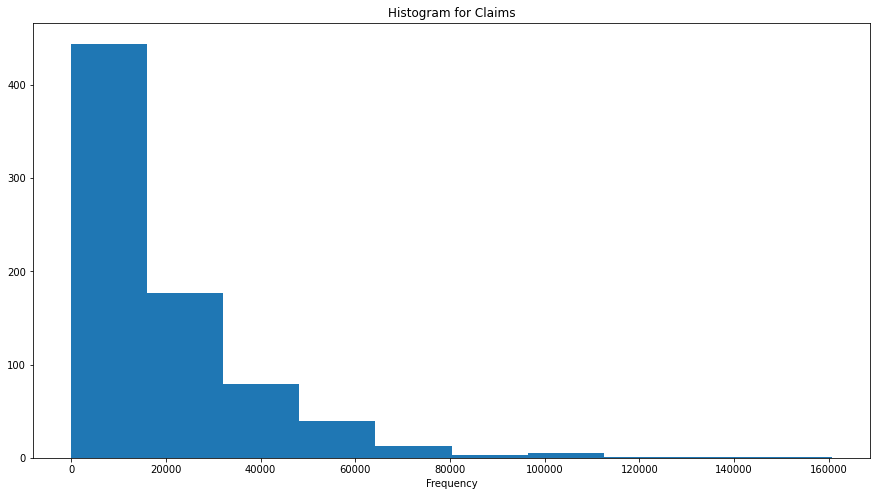

In [12]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df["claims_total_building_insurance_coverage_avg"])  
plt.title("Histogram for Claims")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257DAEE3948>,
      dtype=object)

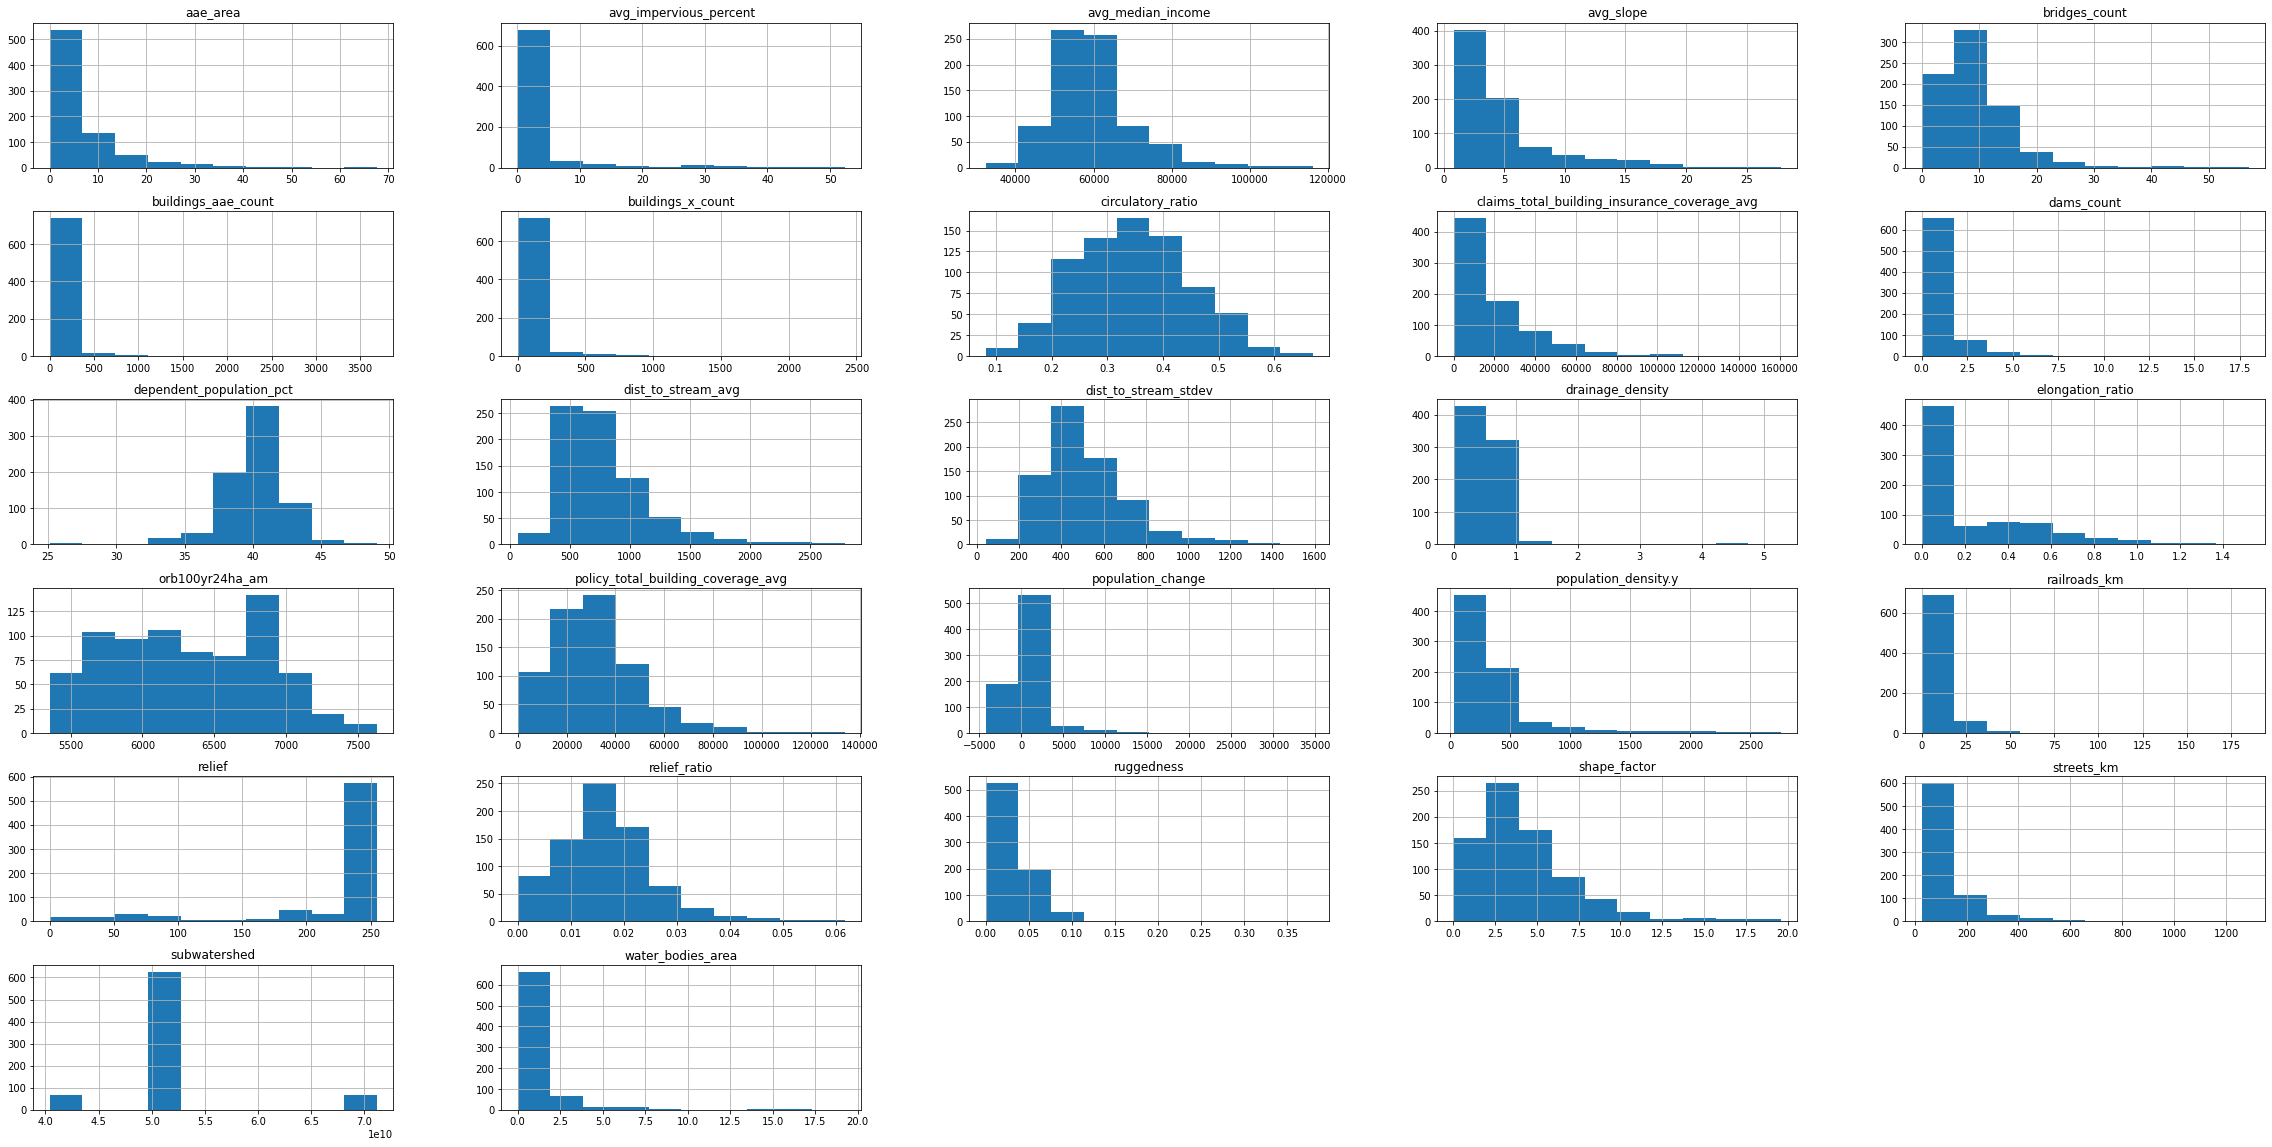

In [13]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df.hist(figsize=(40,20))

### Data Engineering

In [14]:
#Define a variable for each type of feature
target = ["claims_total_building_insurance_coverage_avg"]
test = [x for x in df if x != "claims_total_building_insurance_coverage_avg"]
numeric_columns = [x for x in test if x != "subwatershed"]

In [15]:
print("Shape of Data:",df.shape)
print("Distinct Datatypes:",df.dtypes.unique())
df[numeric_columns].head(5)

Shape of Data: (763, 27)
Distinct Datatypes: [dtype('int64') dtype('float64')]


,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,buildings_aae_count,...,railroads_km,population_density.y,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg
0,0.299470,1.010000e+02,11.031308,0.307262,0.412036,9.386736,3.610590e-03,0.050787,0.697929,0,...,0.000000,193.107921,58111.000000,1673,41.366667,884.262553,503.506692,0.146502,6789.381348,3212.713978
1,0.485784,5.000000e+01,4.080327,0.718304,0.283812,1.484138,4.839883e-03,0.014050,4.034926,1,...,14.381436,104.643085,56771.333333,-431,41.466667,1261.467019,535.669076,1.180721,6862.660156,25613.870480
2,0.322675,2.600000e+01,2.030253,0.815297,0.647139,1.778003,2.980456e-03,0.017181,2.977041,0,...,7.047331,321.678527,48506.750000,-243,41.675000,584.613292,297.702490,1.084871,6175.916504,27111.136390
3,0.326203,3.710738e-09,2.053226,0.000588,0.308209,1.027938,4.436303e-13,0.009651,4.357636,25,...,23.939613,366.175097,61766.200000,38,42.000000,1087.881755,964.682414,4.389772,5982.229004,33976.722030
4,0.379072,7.600000e+01,10.546125,0.172761,0.501159,3.978998,4.231477e-03,0.068939,18.411886,10,...,0.482703,256.032460,55698.400000,-833,40.660000,555.426454,409.885301,1.661841,5676.336426,63568.611420


### Feature Selection using the LassoCV estimator

In [16]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

Automatically created module for IPython interactive environment


In [17]:
X = df[numeric_columns]

In [18]:
X.head(5)

,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,buildings_aae_count,...,railroads_km,population_density.y,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg
0,0.299470,1.010000e+02,11.031308,0.307262,0.412036,9.386736,3.610590e-03,0.050787,0.697929,0,...,0.000000,193.107921,58111.000000,1673,41.366667,884.262553,503.506692,0.146502,6789.381348,3212.713978
1,0.485784,5.000000e+01,4.080327,0.718304,0.283812,1.484138,4.839883e-03,0.014050,4.034926,1,...,14.381436,104.643085,56771.333333,-431,41.466667,1261.467019,535.669076,1.180721,6862.660156,25613.870480
2,0.322675,2.600000e+01,2.030253,0.815297,0.647139,1.778003,2.980456e-03,0.017181,2.977041,0,...,7.047331,321.678527,48506.750000,-243,41.675000,584.613292,297.702490,1.084871,6175.916504,27111.136390
3,0.326203,3.710738e-09,2.053226,0.000588,0.308209,1.027938,4.436303e-13,0.009651,4.357636,25,...,23.939613,366.175097,61766.200000,38,42.000000,1087.881755,964.682414,4.389772,5982.229004,33976.722030
4,0.379072,7.600000e+01,10.546125,0.172761,0.501159,3.978998,4.231477e-03,0.068939,18.411886,10,...,0.482703,256.032460,55698.400000,-833,40.660000,555.426454,409.885301,1.661841,5676.336426,63568.611420


In [19]:
y = df[target]
X = df[numeric_columns]

## Lasso Feature Selection 

In [20]:
lasso_clf = LassoCV().fit(X, y.values.ravel())
lasso_importance = np.abs(lasso_clf.coef_)
print(lasso_importance)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.96289033 0.1662826
 0.         0.         4.32261403 0.         0.         0.1134662
 0.49474825]


## Ridge Feature Selection

In [21]:
ridge_clf = Ridge().fit(X, y.values.ravel())
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

array([5.526565e+03, 2.870000e-01, 9.729300e+01, 4.330760e+02,
       2.699300e+02, 1.636090e+02, 4.214230e+02, 2.229570e+03,
       2.573740e+02, 8.100000e-02, 2.589000e+00, 4.723000e+02,
       6.915920e+02, 5.353000e+00, 7.563000e+00, 1.326300e+02,
       6.869000e+00, 1.810000e-01, 2.460000e-01, 2.934770e+02,
       4.589000e+00, 1.007000e+00, 2.778400e+02, 2.418000e+00,
       4.700000e-01])

In [22]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 10
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

[ 9 17 18  1 24 21 23 10 20 13 16 14  2 15  5  8  4 22 19  6  3 11 12  7
  0]
Threshold is: 701.5923746410056
Selected features: ['circulatory_ratio' 'ruggedness' 'dams_count' 'water_bodies_area'
 'elongation_ratio' 'relief_ratio' 'dependent_population_pct'
 'avg_impervious_percent' 'drainage_density' 'aae_area']


In [23]:
# ridge_threshold = ridge_importance[idx_third] + 10
# print('Threshold is: {}'.format(ridge_threshold))

In [24]:
# How many features do we want?
# Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['circulatory_ratio' 'ruggedness' 'dams_count' 'water_bodies_area'
 'elongation_ratio' 'relief_ratio' 'dependent_population_pct'
 'avg_impervious_percent' 'drainage_density' 'aae_area']


In [25]:
sfm = SelectFromModel(ridge_clf, threshold=ridge_threshold)
sfm.fit(X, y.values.ravel())
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

### Min Max Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data = df.loc[:, df.columns != 'subwatershed']
scaler.fit(df_data)
df_scale = scaler.transform(df_data)
np.round(df_scale, 3)

array([[0.371, 0.396, 0.378, ..., 0.629, 0.024, 0.007],
       [0.688, 0.196, 0.121, ..., 0.662, 0.191, 0.017],
       [0.41 , 0.102, 0.045, ..., 0.36 , 0.202, 0.177],
       ...,
       [0.508, 0.076, 0.012, ..., 0.564, 0.209, 0.018],
       [0.337, 0.227, 0.101, ..., 0.985, 0.161, 0.113],
       [0.508, 0.108, 0.029, ..., 0.66 , 0.   , 0.   ]])

In [27]:
df_scale_dataframe = pd.DataFrame(df_scale)

In [28]:
X=df_data.loc[:, df_data.columns != 'claims_total_building_insurance_coverage_avg']
y=df_data.loc[:, df_data.columns == 'claims_total_building_insurance_coverage_avg']

# create target scaler object
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y)

MinMaxScaler()

In [30]:
#ensemble_scale=scalarY.transform(pd.DataFrame(df['Ensemble Predicted']))

In [31]:
#pd.DataFrame(ensemble_scale).to_csv("ensemble_predicted.csv")

## Train Test Split

In [32]:
X=df_data.loc[:, df_data.columns != 'claims_total_building_insurance_coverage_avg']
y=df_data.loc[:, df_data.columns == 'claims_total_building_insurance_coverage_avg']

# create target scaler object
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y)

MinMaxScaler()

In [33]:
df_data['subwatershed'] = df['subwatershed']

In [34]:
target = ["claims_total_building_insurance_coverage_avg", 'subwatershed']
numeric_columns = [x for x in df if x != "claims_total_building_insurance_coverage_avg"]

In [35]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(df_data[numeric_columns], df_data[target],test_size=0.2,random_state=2018)
# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)


In [36]:
x_train.to_csv("x_train.csv")
x_valid.to_csv("x_valid.csv")
x_test.to_csv("x_test.csv")
y_train.to_csv("y_train.csv")
y_valid.to_csv("y_valid.csv")
y_test.to_csv("y_test.csv")

In [37]:
x_train_mod = x_train.loc[:, x_train.columns != 'subwatershed']
x_valid_mod = x_valid.loc[:, x_valid.columns != 'subwatershed']
x_test_mod = x_test.loc[:, x_test.columns != 'subwatershed']
y_train_mod = y_train.loc[:, y_train.columns != 'subwatershed']
y_valid_mod = y_valid.loc[:, y_valid.columns != 'subwatershed']
y_test_mod = y_test.loc[:, y_test.columns != 'subwatershed']

### Remove Subwatershed for transformation

In [38]:
# transform target variables
y_train_mod = scalarY.transform(y_train_mod)
y_test_mod = scalarY.transform(y_test_mod)
y_valid_mod = scalarY.transform(y_valid_mod)

x_train_mod = scalarX.transform(x_train_mod)
x_test_mod = scalarX.transform(x_test_mod)
x_valid_mod = scalarX.transform(x_valid_mod)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train_mod.shape)
print("Shape of x_val:",x_valid_mod.shape)
print("Shape of x_test:",x_test_mod.shape)
print("Shape of y_train:",y_train_mod.shape)
print("Shape of y_val:",y_valid_mod.shape)
print("Shape of y_test:",y_test_mod.shape)

Shape of x_train: (549, 25)
Shape of x_val: (61, 25)
Shape of x_test: (153, 25)
Shape of y_train: (549, 1)
Shape of y_val: (61, 1)
Shape of y_test: (153, 1)


In [39]:
x_train_columns = x_train.columns
x_numeric_columns = [x for x in x_train_columns if x != "subwatershed"]
y_train_columns = y_train.columns
y_numeric_columns = [x for x in y_train_columns if x != "subwatershed"]

In [40]:
### x train
x_train_mod_df = pd.DataFrame(x_train_mod, columns=x_numeric_columns)
x_train_sub = pd.DataFrame(x_train['subwatershed'])
x_train_mod_df['subwatershed'] = x_train_sub.iloc[:,0].values

### x valid
x_valid_mod_df = pd.DataFrame(x_valid_mod, columns=x_numeric_columns)
x_valid_sub = pd.DataFrame(x_valid['subwatershed'])
x_valid_mod_df['subwatershed'] = x_valid_sub.iloc[:,0].values

### x test
x_test_mod_df = pd.DataFrame(x_test_mod, columns=x_numeric_columns)
x_test_sub = pd.DataFrame(x_test['subwatershed'])
x_test_mod_df['subwatershed'] = x_test_sub.iloc[:,0].values

### y train
y_train_mod_df = pd.DataFrame(y_train_mod, columns=y_numeric_columns)
y_train_sub=pd.DataFrame(y_train['subwatershed'])
y_train_mod_df['subwatershed'] = y_train_sub.iloc[:,0].values

### y valid
y_valid_mod_df = pd.DataFrame(y_valid_mod, columns=y_numeric_columns)
y_valid_sub=pd.DataFrame(y_valid['subwatershed'])
y_valid_mod_df['subwatershed'] = y_valid_sub.iloc[:,0].values

### y test
y_test_mod_df = pd.DataFrame(y_test_mod, columns=y_numeric_columns)
y_test_sub=pd.DataFrame(y_test['subwatershed'])
y_test_mod_df['subwatershed'] = y_test_sub.iloc[:,0].values


In [41]:
x_train_mod_df.to_csv("x_train_model.csv")
x_valid_mod_df.to_csv("x_valid_model.csv")
x_test_mod_df.to_csv("x_test_model.csv")
y_train_mod_df.to_csv("y_train_model.csv")
y_valid_mod_df.to_csv("y_valid_model.csv")
y_test_mod_df.to_csv("y_test_model.csv")

In [42]:
y_train_mod

array([[3.47561966e-01],
       [7.51107237e-01],
       [1.87600021e-01],
       [3.02659107e-02],
       [3.63621824e-01],
       [2.86739137e-01],
       [9.83392783e-03],
       [1.22617687e-01],
       [4.11210574e-02],
       [3.11977033e-02],
       [2.05374361e-01],
       [4.78137051e-02],
       [2.64784566e-02],
       [5.63817464e-02],
       [1.26168926e-01],
       [4.64589827e-02],
       [7.61839446e-02],
       [1.59987341e-02],
       [3.38872470e-01],
       [0.00000000e+00],
       [1.51496301e-01],
       [1.88662896e-01],
       [2.47560759e-02],
       [1.34710550e-01],
       [0.00000000e+00],
       [8.08924558e-02],
       [1.39180353e-01],
       [5.27457147e-03],
       [0.00000000e+00],
       [1.95005652e-01],
       [8.75270559e-02],
       [3.00926198e-01],
       [1.00196746e-01],
       [6.03469763e-02],
       [7.67978760e-03],
       [1.39710620e-01],
       [5.82639121e-04],
       [1.22189304e-03],
       [1.56345172e-03],
       [4.96144875e-02],


In [43]:
# y_train = train["claims_total_building_insurance_coverage_avg"]
# y_val = valid["claims_total_building_insurance_coverage_avg"]
# y_test = test["claims_total_building_insurance_coverage_avg"]

# x_train = train[train != "claims_total_building_insurance_coverage_avg"]
# x_valid = valid["claims_total_building_insurance_coverage_avg"]
# x_test = test["claims_total_building_insurance_coverage_avg"]

In [44]:
# x_train = train.drop(columns=["claims_total_building_insurance_coverage_avg"]) 
# x_val = valid.drop(columns=["claims_total_building_insurance_coverage_avg"]) 
# x_test = test.drop(columns=["claims_total_building_insurance_coverage_avg"]) 

## Modelling a ridge regression in Python

In [45]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), x_train, y_train, scoring= "neg_mean_squared_error", cv = 5)

Ill-conditioned matrix (rcond=4.68741e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.79862e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.02766e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.49653e-23): result may not be accurate.
Ill-conditioned matrix (rcond=4.88253e-23): result may not be accurate.


array([-1.55845748e+08, -2.01143063e+08, -1.12265153e+08, -2.21839364e+08,
       -2.15406018e+08])

In [46]:
# Let’s look at the coefficients of the model:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

Ill-conditioned matrix (rcond=4.68741e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.79862e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.02766e-23): result may not be accurate.
Ill-conditioned matrix (rcond=5.49653e-23): result may not be accurate.
Ill-conditioned matrix (rcond=4.88253e-23): result may not be accurate.


array([12483.81945619, 14182.49143581, 10595.52513659, 14894.2728752 ,
       14676.71687241])

Ill-conditioned matrix (rcond=4.16433e-25): result may not be accurate.
Ill-conditioned matrix (rcond=5.79421e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.66865e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.93807e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.3067e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.16895e-25): result may not be accurate.
Ill-conditioned matrix (rcond=5.79986e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.67352e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.94341e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.31148e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.17357e-25): result may not be accurate.
Ill-conditioned matrix (rcond=5.80551e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.67839e-25): result may not be accurate.
Ill-conditioned matrix (rcond=4.94875e-25): result may not be acc

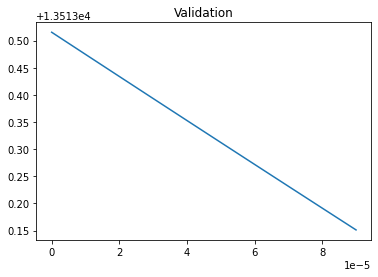

In [47]:
# sns.set_style("white")
# # Now let us look at a chart about the coefficients in the model:
alphas = np.arange(0,0.0001,0.00001)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

In [48]:
cv_ridge[cv_ridge.values == cv_ridge.min()]

0.00009    13513.151164
dtype: float64

In [49]:
ridge_clf = Ridge(alpha = 0.7).fit(x_train, y_train)

Ill-conditioned matrix (rcond=2.8988e-23): result may not be accurate.


In [50]:
# clf = MultiTaskLassoCV().fit(x_train, y_train)
# importance = np.abs(clf.coef_)
# print(importance)

# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.001

# idx_features = (-importance).argsort()[:2]
# name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(name_features))

# sfm = SelectFromModel(clf, threshold=threshold)
# sfm.fit(x_train, y_train)
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

In [51]:
# plt.title(
#     "Features from diabets using SelectFromModel with "
#     "threshold %0.3f." % sfm.threshold)
# feature1 = X_transform[:, 0]
# feature2 = X_transform[:, 1]
# plt.plot(feature1, feature2, 'r.')
# plt.xlabel("First feature: {}".format(name_features[0]))
# plt.ylabel("Second feature: {}".format(name_features[1]))
# plt.ylim([np.min(feature2), np.max(feature2)])
# plt.show()

In [52]:
# ridge_importance = np.abs(ridge_clf.coef_)
# np.round(ridge_importance,3)

# feature_names = numeric_columns
# idx_third = ridge_importance.argsort()[-3]
# print(ridge_importance.argsort())

# ridge_threshold = ridge_importance[idx_third] + 0.000001
# print('Threshold is: {}'.format(ridge_threshold))

# # # How many features do we want?
# # # Get the indicies
# idx_features = (-ridge_importance).argsort()

# # # subset by the indicies
# name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(name_features))

In [53]:
# ###Model Lasso regression
# coef = pd.Series(model_ridge.coef_, index = x_train.columns)
# coef.head()

In [54]:
# ###Model Lasso regression
# model_lasso = LassoCV(alphas=alphas).fit(x_train, y_train.values.ravel())
# coef = pd.Series(model_lasso.coef_, index = x_train.columns)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [55]:
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [56]:
# import matplotlib
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

### Creating Baseline Accuracy

In [57]:
#calcualte the average score of the train dataset
mean_claims = y_train.mean()
print("Average Claims :",mean_claims) 

Average Claims : claims_total_building_insurance_coverage_avg    1.809326e+04
subwatershed                                    5.191906e+10
dtype: float64


In [58]:
#Calculate the Mean Absolute Error on the test dataset
# print("MAE for Test Data:",abs(y_test - mean_claims).mean()[0])

# -------------- Deep Learning ------------------
### Designing the Deep Neural Network

In [59]:
# #Use the model's evaluate method to predict and evaluate the test datasets
# result = model.evaluate(x_test,y_test)

# #Print the results
# for i in range(len(model.metrics_names)):
#     print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

In [76]:


model3 = Sequential()
model3.add(Dense(150, input_dim = 25, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(1, activation = "linear", use_bias=True))

model3.compile(optimizer='sgd',loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])

model3.fit(x_train_mod,y_train_mod, validation_data=(x_valid_mod,y_valid_mod),epochs=30,batch_size=64)

result = model3.evaluate(x_test_mod,y_test_mod)
for i in range(len(model3.metrics_names)):
    print("Metric ",model3.metrics_names[i],":",str(round(result[i],2)))


Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 0.0278 - root_mean_squared_error: 0.166 - 0s 14ms/step - loss: 0.0333 - root_mean_squared_error: 0.1824 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1341
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.118 - 0s 5ms/step - loss: 0.0226 - root_mean_squared_error: 0.1505 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1136
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 0.0145 - root_mean_squared_error: 0.120 - 0s 6ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1061
Epoch 4/30
9/9 [==============================] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.134 - 0s 6ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 5/30
9/9 [==============================] - ETA: 0s - loss: 0.0285 - root_mean_squared_er

### EARLY STOPPING

Epoch 1/150
55/55 [==============================] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.2112 - mse: 0.0446 - mae: 0.1321 - mape: 33027.6211 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0310 - root_mean_squared_error: 0.1761 - mse: 0.0310 - mae: 0.1408 - mape: 13032978.0000 - accuracy: 0.092 - ETA: 0s - loss: 0.0269 - root_mean_squared_error: 0.1639 - mse: 0.0269 - mae: 0.1274 - mape: 13549149.0000 - accuracy: 0.09 - ETA: 0s - loss: 0.0241 - root_mean_squared_error: 0.1552 - mse: 0.0241 - mae: 0.1189 - mape: 13290641.0000 - accuracy: 0.09 - ETA: 0s - loss: 0.0224 - root_mean_squared_error: 0.1497 - mse: 0.0224 - mae: 0.1134 - mape: 12118905.0000 - accuracy: 0.08 - ETA: 0s - loss: 0.0222 - root_mean_squared_error: 0.1490 - mse: 0.0222 - mae: 0.1116 - mape: 11397356.0000 - accuracy: 0.08 - 1s 11ms/step - loss: 0.0209 - root_mean_squared_error: 0.1445 - mse: 0.0209 - mae: 0.1085 - mape: 10448734.0000 - accuracy: 0.0801 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0969 

55/55 [==============================] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1181 - mse: 0.0139 - mae: 0.0991 - mape: 3632.1782 - accuracy: 0.0000e+ - ETA: 0s - loss: 0.0179 - root_mean_squared_error: 0.1336 - mse: 0.0179 - mae: 0.0839 - mape: 7926990.5000 - accuracy: 0.0750 - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1166 - mse: 0.0136 - mae: 0.0801 - mape: 5659996.0000 - accuracy: 0.060 - ETA: 0s - loss: 0.0116 - root_mean_squared_error: 0.1075 - mse: 0.0116 - mae: 0.0752 - mape: 5530888.0000 - accuracy: 0.059 - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1063 - mse: 0.0113 - mae: 0.0745 - mape: 7095244.5000 - accuracy: 0.079 - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - mse: 0.0122 - mae: 0.0769 - mape: 7186947.0000 - accuracy: 0.0801 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875 - val_mse: 0.0077 - val_mae: 0.0570 - val_mape: 4512907.0000 - val_accuracy: 0.0820
Epoch 10/150
55/55 [==============================] - ETA:

55/55 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1090 - mse: 0.0119 - mae: 0.0906 - mape: 6423513.0000 - accuracy: 0.100 - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1022 - mse: 0.0104 - mae: 0.0746 - mape: 5166422.5000 - accuracy: 0.076 - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1135 - mse: 0.0129 - mae: 0.0779 - mape: 6792527.5000 - accuracy: 0.084 - ETA: 0s - loss: 0.0113 - root_mean_squared_error: 0.1062 - mse: 0.0113 - mae: 0.0730 - mape: 7658246.5000 - accuracy: 0.092 - ETA: 0s - loss: 0.0106 - root_mean_squared_error: 0.1031 - mse: 0.0106 - mae: 0.0710 - mape: 6359545.5000 - accuracy: 0.082 - 0s 5ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - mse: 0.0110 - mae: 0.0729 - mape: 6430000.0000 - accuracy: 0.0801 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877 - val_mse: 0.0077 - val_mae: 0.0668 - val_mape: 7369698.0000 - val_accuracy: 0.0820
Epoch 18/150
55/55 [==============================] - ETA: 

55/55 [==============================] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0862 - mse: 0.0074 - mae: 0.0622 - mape: 49.7070 - accuracy: 0.0000e+ - ETA: 0s - loss: 0.0080 - root_mean_squared_error: 0.0894 - mse: 0.0080 - mae: 0.0627 - mape: 3356594.5000 - accuracy: 0.062 - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0987 - mse: 0.0097 - mae: 0.0693 - mape: 4644026.5000 - accuracy: 0.079 - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.1035 - mse: 0.0107 - mae: 0.0717 - mape: 6319307.0000 - accuracy: 0.082 - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0987 - mse: 0.0097 - mae: 0.0695 - mape: 5517699.0000 - accuracy: 0.073 - 0s 5ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - mse: 0.0098 - mae: 0.0695 - mape: 5797299.5000 - accuracy: 0.0801 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878 - val_mse: 0.0077 - val_mae: 0.0628 - val_mape: 3985114.0000 - val_accuracy: 0.0820
Epoch 26/150
55/55 [==============================] - ETA: 0s

Epoch 34/150
55/55 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0642 - mse: 0.0041 - mae: 0.0541 - mape: 22918.8750 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.1051 - mse: 0.0110 - mae: 0.0685 - mape: 2308210.2500 - accuracy: 0.0500  - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.0937 - mse: 0.0088 - mae: 0.0633 - mape: 4451699.5000 - accuracy: 0.085 - ETA: 0s - loss: 0.0081 - root_mean_squared_error: 0.0898 - mse: 0.0081 - mae: 0.0628 - mape: 3924332.7500 - accuracy: 0.077 - 0s 5ms/step - loss: 0.0076 - root_mean_squared_error: 0.0870 - mse: 0.0076 - mae: 0.0610 - mape: 4039925.2500 - accuracy: 0.0801 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890 - val_mse: 0.0079 - val_mae: 0.0622 - val_mape: 5433248.5000 - val_accuracy: 0.0820
Epoch 35/150
55/55 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0686 - mse: 0.0047 - mae: 0.0538 - mape: 6950.2788 - accuracy:

55/55 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1113 - mse: 0.0124 - mae: 0.0737 - mape: 5679742.0000 - accuracy: 0.200 - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0789 - mse: 0.0062 - mae: 0.0573 - mape: 5008932.0000 - accuracy: 0.100 - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0830 - mse: 0.0069 - mae: 0.0585 - mape: 4902902.5000 - accuracy: 0.090 - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0822 - mse: 0.0068 - mae: 0.0573 - mape: 4792858.0000 - accuracy: 0.086 - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0817 - mse: 0.0067 - mae: 0.0573 - mape: 4372829.5000 - accuracy: 0.0820 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0886 - val_mse: 0.0078 - val_mae: 0.0632 - val_mape: 4744633.5000 - val_accuracy: 0.0820
Epoch 44/150
55/55 [==============================] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.0988 - mse: 0.0098 - mae: 0.0798 - mape: 6278840.5000 - accuracy: 0.100 - ETA: 

55/55 [==============================] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0688 - mse: 0.0047 - mae: 0.0584 - mape: 5709794.5000 - accuracy: 0.100 - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0689 - mse: 0.0047 - mae: 0.0493 - mape: 3027568.2500 - accuracy: 0.081 - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0804 - mse: 0.0065 - mae: 0.0529 - mape: 4165274.7500 - accuracy: 0.090 - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0795 - mse: 0.0063 - mae: 0.0537 - mape: 3779207.7500 - accuracy: 0.087 - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0805 - mse: 0.0065 - mae: 0.0563 - mape: 4321310.5000 - accuracy: 0.079 - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0820 - mse: 0.0067 - mae: 0.0570 - mape: 4645257.5000 - accuracy: 0.082 - 0s 6ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - mse: 0.0067 - mae: 0.0570 - mape: 4645257.5000 - accuracy: 0.0820 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912 - val_mse: 0.0083

55/55 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0549 - mse: 0.0030 - mae: 0.0523 - mape: 13637.9482 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0833 - mse: 0.0069 - mae: 0.0569 - mape: 5170888.0000 - accuracy: 0.0857  - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0746 - mse: 0.0056 - mae: 0.0512 - mape: 4308902.0000 - accuracy: 0.076 - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0822 - mse: 0.0068 - mae: 0.0532 - mape: 4955157.0000 - accuracy: 0.087 - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0801 - mse: 0.0064 - mae: 0.0524 - mape: 4190430.0000 - accuracy: 0.080 - 0s 5ms/step - loss: 0.0063 - root_mean_squared_error: 0.0797 - mse: 0.0063 - mae: 0.0523 - mape: 4136126.7500 - accuracy: 0.0801 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873 - val_mse: 0.0076 - val_mae: 0.0638 - val_mape: 2961227.7500 - val_accuracy: 0.0820
Epoch 60/150
55/55 [==============================] - E

Epoch 68/150
55/55 [==============================] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0335 - mse: 0.0011 - mae: 0.0283 - mape: 2060503.6250 - accuracy: 0.100 - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0676 - mse: 0.0046 - mae: 0.0469 - mape: 3143940.2500 - accuracy: 0.050 - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0690 - mse: 0.0048 - mae: 0.0481 - mape: 4450688.0000 - accuracy: 0.065 - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0699 - mse: 0.0049 - mae: 0.0485 - mape: 4256306.5000 - accuracy: 0.076 - 0s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - mse: 0.0049 - mae: 0.0482 - mape: 3913133.5000 - accuracy: 0.0820 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896 - val_mse: 0.0080 - val_mae: 0.0608 - val_mape: 2950122.0000 - val_accuracy: 0.0820
Epoch 69/150
55/55 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0523 - mse: 0.0027 - mae: 0.0457 - mape: 3357.0801 - accuracy: 0.0

55/55 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0386 - mse: 0.0015 - mae: 0.0255 - mape: 3672326.7500 - accuracy: 0.100 - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0735 - mse: 0.0054 - mae: 0.0525 - mape: 4072029.0000 - accuracy: 0.100 - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0701 - mse: 0.0049 - mae: 0.0494 - mape: 3487074.2500 - accuracy: 0.080 - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0688 - mse: 0.0047 - mae: 0.0475 - mape: 3578028.2500 - accuracy: 0.082 - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0687 - mse: 0.0047 - mae: 0.0475 - mape: 3425302.5000 - accuracy: 0.0820 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0924 - val_mse: 0.0085 - val_mae: 0.0686 - val_mape: 3470172.2500 - val_accuracy: 0.0820
Epoch 78/150
55/55 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0600 - mse: 0.0036 - mae: 0.0483 - mape: 80.6905 - accuracy: 0.0000e+ - ETA: 0s

55/55 [==============================] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.0925 - mse: 0.0086 - mae: 0.0582 - mape: 26848.0742 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0549 - mse: 0.0030 - mae: 0.0411 - mape: 2499089.0000 - accuracy: 0.0786  - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0617 - mse: 0.0038 - mae: 0.0429 - mape: 3260867.0000 - accuracy: 0.080 - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0615 - mse: 0.0038 - mae: 0.0421 - mape: 3057130.7500 - accuracy: 0.075 - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0622 - mse: 0.0039 - mae: 0.0432 - mape: 3533630.5000 - accuracy: 0.0820 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0943 - val_mse: 0.0089 - val_mae: 0.0653 - val_mape: 3148260.2500 - val_accuracy: 0.0820
Epoch 87/150
55/55 [==============================] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546 - mse: 0.0030 - mae: 0.0456 - mape: 85.4981 - accuracy: 0.0000e+ - ETA

55/55 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0435 - mse: 0.0019 - mae: 0.0349 - mape: 8569088.0000 - accuracy: 0.200 - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506 - mse: 0.0026 - mae: 0.0363 - mape: 4056526.0000 - accuracy: 0.113 - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0543 - mse: 0.0029 - mae: 0.0384 - mape: 3727279.0000 - accuracy: 0.096 - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0590 - mse: 0.0035 - mae: 0.0409 - mape: 3022364.5000 - accuracy: 0.082 - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0617 - mse: 0.0038 - mae: 0.0423 - mape: 3029545.0000 - accuracy: 0.083 - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - mse: 0.0037 - mae: 0.0422 - mape: 2932773.5000 - accuracy: 0.0820 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019 - val_mse: 0.0104 - val_mae: 0.0705 - val_mape: 3887631.7500 - val_accuracy: 0.0820
Epoch 96/150
55/55 [==============================] - ETA: 

Epoch 103/150
55/55 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0386 - mse: 0.0015 - mae: 0.0296 - mape: 1439.9768 - accuracy: 0.0000e+ - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503 - mse: 0.0025 - mae: 0.0365 - mape: 2879858.0000 - accuracy: 0.0900 - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565 - mse: 0.0032 - mae: 0.0388 - mape: 2321556.5000 - accuracy: 0.094 - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0612 - mse: 0.0037 - mae: 0.0427 - mape: 2165371.2500 - accuracy: 0.073 - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0581 - mse: 0.0034 - mae: 0.0411 - mape: 2526469.0000 - accuracy: 0.074 - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0578 - mse: 0.0033 - mae: 0.0411 - mape: 3070227.0000 - accuracy: 0.079 - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577 - mse: 0.0033 - mae: 0.0413 - mape: 2976774.2500 - accuracy: 0.082 - 0s 7ms/step - loss: 0.0033 - root_mean_squared_error: 0.0577 -

55/55 [==============================] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0381 - mse: 0.0015 - mae: 0.0291 - mape: 27.2960 - accuracy: 0.0000e+ - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0579 - mse: 0.0033 - mae: 0.0408 - mape: 2700272.0000 - accuracy: 0.080 - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0616 - mse: 0.0038 - mae: 0.0432 - mape: 2288618.2500 - accuracy: 0.081 - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0637 - mse: 0.0041 - mae: 0.0443 - mape: 2025162.7500 - accuracy: 0.077 - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0622 - mse: 0.0039 - mae: 0.0432 - mape: 1937331.2500 - accuracy: 0.072 - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0626 - mse: 0.0039 - mae: 0.0442 - mape: 3150099.7500 - accuracy: 0.083 - 0s 8ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - mse: 0.0040 - mae: 0.0449 - mape: 3090159.5000 - accuracy: 0.0820 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0967 - val_mse: 0.0093 -

55/55 [==============================] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0452 - mse: 0.0020 - mae: 0.0321 - mape: 10054464.0000 - accuracy: 0.10 - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0645 - mse: 0.0042 - mae: 0.0410 - mape: 2595463.7500 - accuracy: 0.0667 - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0587 - mse: 0.0034 - mae: 0.0396 - mape: 3191780.2500 - accuracy: 0.084 - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0554 - mse: 0.0031 - mae: 0.0375 - mape: 2920777.5000 - accuracy: 0.080 - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0541 - mse: 0.0029 - mae: 0.0375 - mape: 2895058.2500 - accuracy: 0.082 - 0s 6ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - mse: 0.0037 - mae: 0.0390 - mape: 2847362.7500 - accuracy: 0.0801 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009 - val_mse: 0.0102 - val_mae: 0.0770 - val_mape: 3263849.2500 - val_accuracy: 0.0820
Epoch 118/150
55/55 [==============================] - ETA

55/55 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0397 - mse: 0.0016 - mae: 0.0340 - mape: 416.5064 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443 - mse: 0.0020 - mae: 0.0342 - mape: 1490022.8750 - accuracy: 0.064 - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0500 - mse: 0.0025 - mae: 0.0364 - mape: 2350264.0000 - accuracy: 0.082 - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0509 - mse: 0.0026 - mae: 0.0374 - mape: 2391097.2500 - accuracy: 0.083 - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0531 - mse: 0.0028 - mae: 0.0380 - mape: 2964103.5000 - accuracy: 0.081 - 0s 6ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - mse: 0.0027 - mae: 0.0377 - mape: 2894741.0000 - accuracy: 0.0820 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0971 - val_mse: 0.0094 - val_mae: 0.0717 - val_mape: 3393699.7500 - val_accuracy: 0.0820
Epoch 126/150
55/55 [==============================] - ETA:

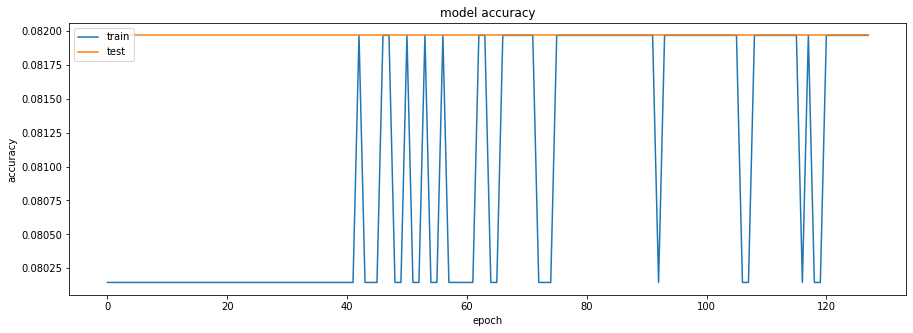

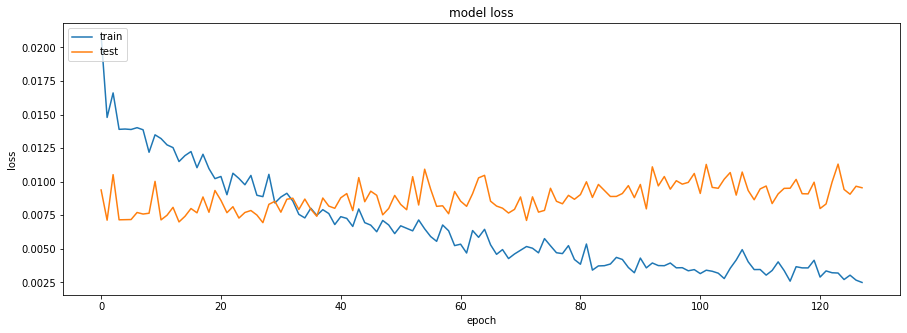

In [102]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=100)]

model4 = Sequential()
model4.add(Dense(350,input_dim = 25, activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(25,)))
model4.add(Dense(1, activation = "linear"))

model4.compile(optimizer='adam',loss="mean_squared_error", 
               metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mse', 'mae', 'mape','accuracy'])

# model4.fit(x_train_mod,y_train_mod, 
#            validation_data=(x_valid_mod,y_valid_mod), 
#            epochs=150,
#            batch_size=64,
#            callbacks=callbacks)

history = model4.fit(x_train_mod, y_train_mod, validation_data=(x_valid_mod,y_valid_mod), epochs=150, batch_size=10, callbacks=callbacks)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# result = model4.evaluate(x_test_mod,y_test_mod)

# for i in range(len(model4.metrics_names)):
#     print("Metric ",model4.metrics_names[i],":",str(round(result[i],2)))


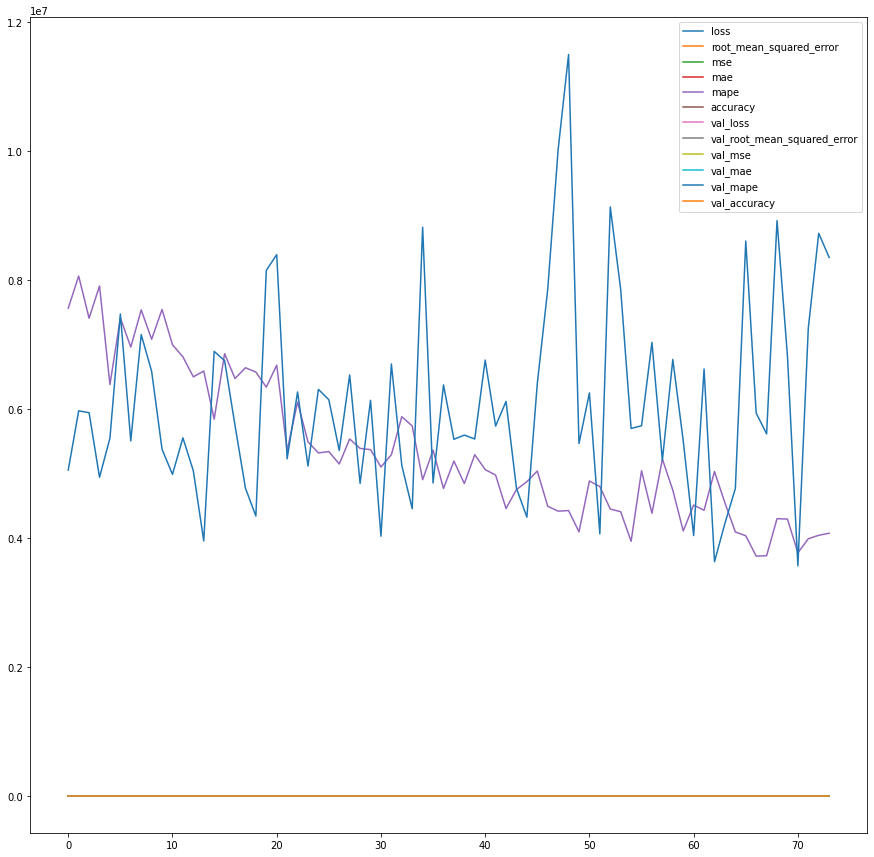

In [92]:
losses = pd.DataFrame(model4.history.history)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

losses.plot()

In [93]:
# invert transform on predictions
yhat = model4.predict(x_test_mod)
yhat = scalarY.inverse_transform(yhat)
yhat=np.round(yhat,2)

In [94]:
DF_keras = pd.DataFrame(
    data=np.round(yhat,2), columns=['predicted']
)

In [95]:
DF_keras['observed'] = scalarY.inverse_transform(pd.DataFrame(y_test_mod)).round(2)

In [96]:
DF_keras['predicted']=DF_keras.predicted.round(2)

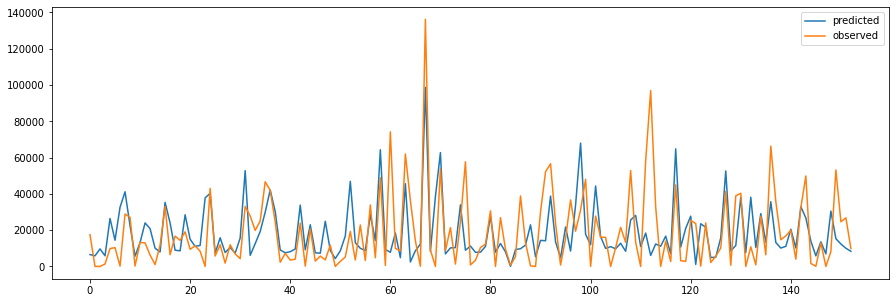

In [99]:
plt.rcParams["figure.figsize"] = (15,5)
DF_keras.plot()

In [68]:
# drf=pd.read_csv("C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\data\\results\\drf_results.csv")
# glm=pd.read_csv("C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\data\\results\\glm_results.csv")
# gbm=pd.read_csv("C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\data\\results\\gbm_results.csv")

In [101]:
DF_keras

,predicted,observed
0,6544.490234,17495.02
1,5849.859863,0.00
2,9663.719727,0.00
3,5874.939941,1320.44
4,26456.419922,9881.27
...,...,...
148,30495.669922,8156.45
149,15291.030273,53180.93
150,12370.500000,24614.98
151,10032.429688,26757.08


In [248]:
DF_drf = pd.DataFrame(
    data=np.round(scalarY.inverse_transform(pd.DataFrame(drf['predicted'])).round(2),2), columns=['predicted']
)
DF_drf['observed'] = scalarY.inverse_transform(pd.DataFrame(y_test_mod)).round(2)

In [250]:
DF_glm = pd.DataFrame(
    data=np.round(scalarY.inverse_transform(pd.DataFrame(glm['predicted'])).round(2),2), columns=['predicted']
)
DF_glm['observed'] = scalarY.inverse_transform(pd.DataFrame(y_test_mod)).round(2)

In [251]:
DF_gbm = pd.DataFrame(
    data=np.round(scalarY.inverse_transform(pd.DataFrame(gbm['predicted'])).round(2),2), columns=['predicted']
)
DF_gbm['observed'] = scalarY.inverse_transform(pd.DataFrame(y_test_mod)).round(2)

In [262]:
DF_keras['subwatershed'] = y_test.iloc[:,1].values 
DF_drf['subwatershed'] = y_test.iloc[:,1].values
DF_glm['subwatershed'] = y_test.iloc[:,1].values
DF_gbm['subwatershed'] = y_test.iloc[:,1].values

In [278]:
DF_keras.to_csv("df_keras.csv")
DF_drf.to_csv("df_drf.csv")
DF_glm.to_csv("df_glm.csv")
DF_gbm.to_csv("df_gbm.csv")

In [277]:
df[df["subwatershed"] == 51201130502]

,subwatershed,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,...,population_density,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
41,51201130502,0.29,60.1,3.03,0.48,4.51,5.53,0.0,0.27,5.75,...,201.48,59962.67,-352,40.7,110.96,65.52,1.17,7079.08,3503.72,1.67


In [281]:
DF_keras

,predicted,observed,subwatershed
0,10452.669922,4209.19,51202020904
1,19085.449219,56459.03,50800030303
2,17147.109375,15662.72,51402010902
3,7247.689941,1.67,51201130502
4,10870.030273,2902.56,71200010703
5,26388.240234,7139.74,51201081205
6,27383.900391,14171.84,51201020403
7,19063.880859,19699.71,51202011204
8,15933.480469,18706.78,51202011110
9,35566.839844,179.54,40500011001


### Visualing the final results

In [ ]:
# pip install -U shap

In [6]:
# # select a set of background examples to take an expectation over
# background = x_train[np.random.choice(x_train.shape[0], 25, replace=False)]


In [52]:
import tensorflow as tf
# explain predictions of the model on four images
e = shap.DeepExplainer(model4, x_train)
# ...or pass tensors directly


In [56]:
x_test[1:5]

,circulatory_ratio,relief,avg_slope,elongation_ratio,drainage_density,shape_factor,relief_ratio,ruggedness,aae_area,buildings_aae_count,...,railroads_km,population_density,avg_median_income,population_change,dependent_population_pct,dist_to_stream_avg,dist_to_stream_stdev,avg_impervious_percent,orb100yr24ha_am,policy_total_building_coverage_avg
1,0.576923,0.307576,0.121489,0.000000,0.123100,0.110142,0.0,0.128205,0.112770,0.032538,...,0.172692,0.089685,0.530777,0.054521,0.865847,0.163031,0.215228,0.000000,0.638120,0.368763
2,0.096154,0.023872,0.013063,0.000000,0.063830,0.046892,0.0,0.153846,0.280077,0.046367,...,0.346643,0.200063,0.940349,0.103648,0.718894,0.585944,0.549457,0.023737,0.571371,0.364799
3,0.596154,0.023872,0.013063,0.283333,0.112462,0.022356,0.0,0.051282,0.101833,0.001627,...,0.000000,0.002462,0.484481,0.046580,0.889913,0.154606,0.196555,0.023737,0.571371,0.198277
4,0.480769,0.182144,0.050294,0.525000,0.688450,0.128135,0.0,0.487179,0.086314,0.000271,...,0.000000,0.030362,0.590347,0.045923,0.737839,0.007842,0.000715,0.006317,0.264762,0.613777


In [57]:
# # e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
# shap_values = e.shap_values(x_test[1:5])

# # plot the feature attributions
# shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title("Model's Training & Validation loss across epochs")
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()


In [ ]:
# permutation feature importance with knn for regression
# from sklearn.datasets import make_regression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.inspection import permutation_importance
# from matplotlib import pyplot

# X=df_data.loc[:, df_data.columns != 'claims_total_building_insurance_coverage_avg']
# y=df_data.loc[:, df_data.columns == 'claims_total_building_insurance_coverage_avg']

# # define the model
# model = KNeighborsRegressor()
# # fit the model
# model.fit(X, y)
# # perform permutation importance
# results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# # get importance
# importance = results.importances_mean
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [ ]:
train.iloc[:, [39]]